# 3. Exchange Economy

In [30]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.stats import skew
from scipy.stats import kurtosis
import math
from mpl_toolkits.mplot3d import Axes3D
import itertools
import matplotlib.pyplot as plt

In [31]:
# a. parameters
N = 50000
mu = np.array([1.5,2,1]) 
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 3
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N)) 
betas  = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

## **Question 3.1**

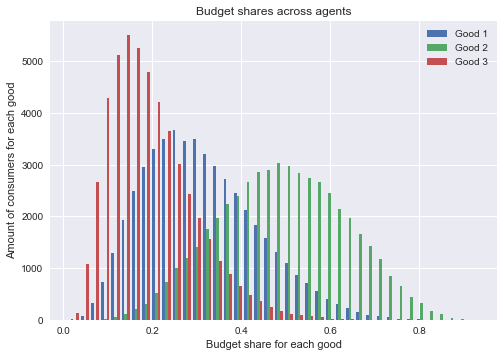

In [32]:
plt.style.use('seaborn')
plt.hist(betas, bins = 40, label = ['Good 1', 'Good 2', 'Good 3'])
plt.title('Budget shares across agents')
plt.xlabel('Budget share for each good')
plt.ylabel('Amount of consumers for each good')
plt.legend()

In [33]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas  = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# Exponentially distributed endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

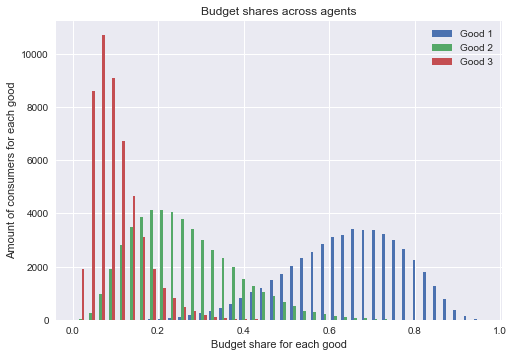

In [34]:
plt.style.use('seaborn')
plt.hist(betas, bins = 40, label = ['Good 1', 'Good 2', 'Good 3'])
plt.title('Budget shares across agents')
plt.xlabel('Budget share for each good')
plt.ylabel('Amount of consumers for each good')
plt.legend()

We notice that the budget share across agents depends on the $\mu$-vector due to its role in determining the consumer's valuation of each good. Good 3 has the lowest value for consumers for the given $\mu$-vector and therefore the lowest budget share.

## **Question 3.2**

To plot the excess demand functions we first determine demand for each good. We then use this function to determine the demand in excess of the supply given by the endowments.

In [35]:
# demand functions
def good1_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,0]*I/p1

def good2_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,1]*I/p2

def good3_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,2]*I

# excess demand function 1
def excess1_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_1 = np.sum(good1_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_1 = np.sum(e1)
    
    # excess demand
    excess_demand_1 = demand_1 - supply_1
    
    return excess_demand_1

# excess demand function 2
def excess2_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_2 = np.sum(good2_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_2 = np.sum(e2)
    
    # excess demand
    excess_demand_2 = demand_2 - supply_2
    
    return excess_demand_2

# excess demand function 3
def excess3_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_3 = np.sum(demand_good_3_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_3 = np.sum(e3)
    
    # excess demand
    excess_demand_3 = demand_3 - supply_3
    
    return excess_demand_3

In [36]:
size = 50

# We create an empty vector
linspace_p1 = np.linspace(1, 10, size)
linspace_p2 = np.linspace(1, 10, size)

grid1_empty = np.empty((size,size))
grid2_empty = np.empty((size,size))

# Creating excess demand datapoints for all the various combinations of p1 and p2 
p1_grid, p2_grid = np.meshgrid(linspace_p1, linspace_p2) 
for i, p1 in enumerate(linspace_p1):
    for j, p2 in enumerate(linspace_p2):
        grid1_empty[i,j] = excess1_func(betas, p1 , p2, e1, e2, e3)
        grid2_empty[i,j] = excess2_func(betas, p1 , p2, e1, e2, e3)

Text(0.5, 0, '$p_2$')

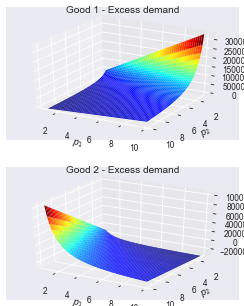

In [37]:
fig = plt.figure(dpi=60, figsize=(5,10))

# Excess demand of good 1 plotted in 3D
axis1 = fig.add_subplot(3,1,1, projection = '3d')
fig1 = axis1.plot_surface(p1_grid, p2_grid, grid1_empty, cmap=plt.cm.jet, cstride=1, rstride=1)


# Visuals for demand 1
axis1.invert_yaxis()
axis1.set_title('Good 1 - Excess demand')
axis1.set_xlabel('$p_1$')
axis1.set_ylabel('$p_2$')


#Excess demand of good 2 plotted in 3D
axis2 = fig.add_subplot(3,1,2, projection = '3d')
fig2 = axis2.plot_surface(p1_grid, p2_grid, grid2_empty, cmap=plt.cm.jet, cstride=1, rstride=1)

# Visuals for demand 2
axis2.invert_yaxis()
axis2.set_title('Good 2 - Excess demand')
axis2.set_xlabel('$p_1$')
axis2.set_ylabel('$p_2$')

## **Question 3.3**

The Walras-equilibrium is found by a trial-and-error process, namely a tâtonnement process. Our solution is the price points for goods 1 and 2 when no demand for good 3 is present. <br/> 
We initially set the pricepoints to $p_1=2$ and $p_2=2$ and set our tolerance is set at $\frac{1}{100.000}$. We set t equal to 1 and let it move towards the cap at $25.000$ such that the iteration reaches its goal.

In [38]:
epsilon = 0.000001
kappa = 0.05
p1 = 2
p2 = 2

t=1
cap = 25000

while t < cap:
    ex0_1 = excess1_func(betas, p1, p2, e1, e2, e3)
    ex0_2 = excess2_func(betas, p1, p2, e1, e2, e3)
    
    # If both values of ex0_1 are below the threshold value epsilon, break the loop
    if ex0_1 < epsilon and ex0_2 < epsilon:
        print(f'\nBy iterating {t} times, we find that the price of good 1 and 2 in Walras Equilibrium are: p1 = {p1: .3f} and p2 = {p2: .3f} when there exists no excess demand for good 3.')
        p1target = p1
        p2target = p2
        break
    
    # price developments according to the specified process
    else:
        p1 += kappa*ex0_1/N
        p2 += kappa*ex0_2/N
    
    # Choice of which iterations to print
    if (t%5 == 0 and t<=50) or t%2500 == 0 or t == 500 or t == 23432 or t == 23433:
        print(f'Iteration {t} -> ex0_1:{ex0_1:10.4f} - ex0_2: {ex0_2:01.4f} -> p1: {p1:10.4f} - p2: {p2:10.4f}')
             
    t += 1

Iteration 5 -> ex0_1:26560.5053 - ex0_2: -16068.6980 -> p1:     2.1416 - p2:     1.9161
Iteration 10 -> ex0_1:22982.3689 - ex0_2: -14337.7508 -> p1:     2.2633 - p2:     1.8409
Iteration 15 -> ex0_1:20159.1957 - ex0_2: -12690.4051 -> p1:     2.3695 - p2:     1.7742
Iteration 20 -> ex0_1:17879.4868 - ex0_2: -11129.9029 -> p1:     2.4633 - p2:     1.7155
Iteration 25 -> ex0_1:16008.1606 - ex0_2: -9662.2964 -> p1:     2.5469 - p2:     1.6643
Iteration 30 -> ex0_1:14453.5887 - ex0_2: -8294.2288 -> p1:     2.6222 - p2:     1.6201
Iteration 35 -> ex0_1:13150.5245 - ex0_2: -7031.4230 -> p1:     2.6905 - p2:     1.5825
Iteration 40 -> ex0_1:12050.6272 - ex0_2: -5877.7064 -> p1:     2.7529 - p2:     1.5508
Iteration 45 -> ex0_1:11116.9102 - ex0_2: -4834.4943 -> p1:     2.8103 - p2:     1.5246
Iteration 50 -> ex0_1:10320.3432 - ex0_2: -3900.6645 -> p1:     2.8634 - p2:     1.5033
Iteration 500 -> ex0_1: 2262.7241 - ex0_2: 847.8262 -> p1:     4.6939 - p2:     1.9454
Iteration 2500 -> ex0_1:  215.

## **Question 3.4**

We define the utility function given the specifications in the description <br/>
$ u^j (x_1, x_2, x_3) = (x_{1}^{\beta^j_1} x_{2}^{\beta^j_2} x_{3}^{\beta^j_3} )^{\gamma} $, <br/>
and we therefore include $ \gamma $ in the variables list.

    
    

In [39]:
def uj(betas, gamma, p1, p2, e1, e2, e3):
    
    # We use the calculated quantities to determine the consumers' utilities.
    quantity1 = good1_func(betas, p1, p2, e1, e2, e3)
    quantity2 = good2_func(betas, p1, p2, e1, e2, e3)
    quantity3 = good3_func(betas, p1, p2, e1, e2, e3)
    
    # Betas
    good1_betas = np.array([x[0] for x in betas])
    good2_betas = np.array([x[1] for x in betas])
    good3_betas = np.array([x[2] for x in betas])
    
    # Calculation of consumers' utilities.
    return ((quantity1**good1_betas)*(quantity2**good2_betas)*(quantity3**good3_betas))**gamma
    

We set the prices of goods one and two equal to the values determined in **3.3** to allow us to plot the utility distribution below.

In [40]:
p1 = 6.490
p2 = 2.617
uj_stars = uj(betas, gamma, p1, p2, e1, e2, e3)

mean :  3.6372449647522864
variance :  124.06358303855382
skewness :  11.269598169416392
kurtosis :  222.98734987480222


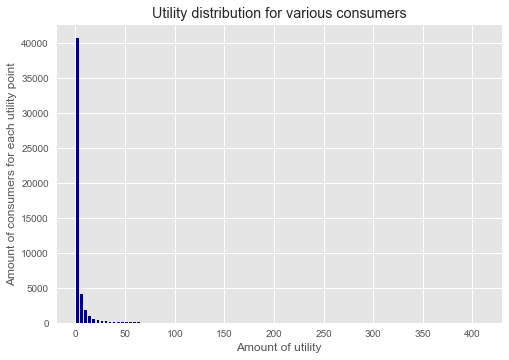

In [41]:
plt.style.use('ggplot')
plt.hist(uj_stars, bins = 100, rwidth = 0.65579, color = 'navy')
plt.title('Utility distribution for various consumers')
plt.xlabel('Amount of utility')
plt.ylabel('Amount of consumers for each utility point')
print("mean : "      , np.mean(uj_stars))
print("variance : "  , np.var(uj_stars))
print("skewness : "  , skew(uj_stars))
print("kurtosis : "  , kurtosis(uj_stars))

We see that skewness is 11.3 indicating a right-skewed figure which we observe by the longer right hand side tail.

## **Question 3.5**

We begin by setting all endowments equal to the mean of initial endowments

In [42]:
# Set new set of endowments, equal to mean of each initial endowment
e1 = np.zeros(N)+np.mean(e1)
e2 = np.zeros(N)+np.mean(e2)
e3 = np.zeros(N)+np.mean(e3)

# We define a new utility function for the evenly distributed endowments
uj_new = uj(betas, gamma, p1, p2, e1, e2, e3)

(array([1.5100e+04, 1.0208e+04, 6.7160e+03, 4.4990e+03, 3.1590e+03,
        2.3390e+03, 1.7030e+03, 1.3110e+03, 9.9300e+02, 7.4200e+02,
        5.7600e+02, 4.4200e+02, 3.2900e+02, 2.6800e+02, 2.1800e+02,
        1.8600e+02, 1.5700e+02, 1.3000e+02, 8.4000e+01, 9.1000e+01,
        7.9000e+01, 6.8000e+01, 5.4000e+01, 5.0000e+01, 5.2000e+01,
        3.9000e+01, 3.9000e+01, 3.8000e+01, 3.1000e+01, 3.6000e+01,
        2.1000e+01, 2.6000e+01, 1.8000e+01, 1.6000e+01, 1.6000e+01,
        8.0000e+00, 8.0000e+00, 1.0000e+01, 8.0000e+00, 1.1000e+01,
        6.0000e+00, 8.0000e+00, 1.1000e+01, 5.0000e+00, 5.0000e+00,
        4.0000e+00, 6.0000e+00, 7.0000e+00, 8.0000e+00, 2.0000e+00,
        5.0000e+00, 5.0000e+00, 3.0000e+00, 5.0000e+00, 5.0000e+00,
        5.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 1.00

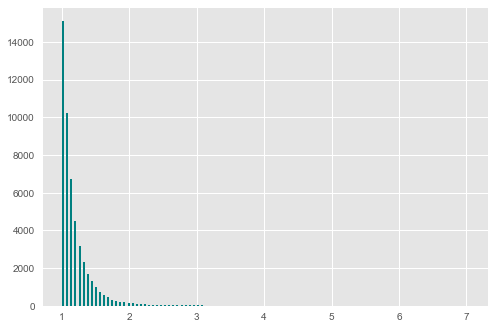

In [43]:
# We plot the new values in a histogram. 
plt.hist(uj_new, bins = 100, label = 'Evenly distributed endowments', color = 'teal', rwidth = 0.49579)

We use the same functions as in **3.3** to reattempt the iteration from a different starting point.

In [44]:
# demand functions
def good1_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,0]*I/p1

def good2_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,1]*I/p2

def good3_func(betas, p1, p2, e1, e2, e3):
    I = p1*e1 + p2*e2 + e3
    return betas[:,2]*I

# excess demand function 1
def excess1_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_1 = np.sum(good1_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_1 = np.sum(e1)
    
    # excess demand
    excess_demand_1 = demand_1 - supply_1
    
    return excess_demand_1

# excess demand function 2
def excess2_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_2 = np.sum(good2_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_2 = np.sum(e2)
    
    # excess demand
    excess_demand_2 = demand_2 - supply_2
    
    return excess_demand_2

# excess demand function 3
def excess3_func(betas, p1, p2, e1, e2, e3):
    
    # demand
    demand_3 = np.sum(demand_good_3_func(betas, p1, p2, e1, e2, e3))
    
    # supply
    supply_3 = np.sum(e3)
    
    # excess demand
    excess_demand_3 = demand_3 - supply_3
    
    return excess_demand_3

In [45]:
epsilon = 0.000001
kappa = 0.06
p1 = 6.490
p2 = 2.617

t=1
cap = 25000

while t < cap:
    ex0_1 = excess1_func(betas, p1, p2, e1, e2, e3)
    ex0_2 = excess2_func(betas, p1, p2, e1, e2, e3)
    
    # If both values of ex0_1 are below the threshold value epsilon, break the loop
    if abs(ex0_1) < epsilon and abs(ex0_2) < epsilon:
        print(f'\nBy iterating {t} times, we find that the price of good 1 and 2 in Walras Equilibrium are: p1 = {p1: .3f} and p2 = {p2: .3f} when there exists no excess demand for good 3.')
        p1target = p1
        p2target = p2
        break
    
    # price developments according to the specified process 
    else:
        p1 += kappa*ex0_1/N
        p2 += kappa*ex0_2/N
    
    # Choice of which iterations to print
    if (t%5 == 0 and t<=50) or t%2500 == 0 or t == 500 or t == 13630 or t == 13631:
        print(f'Iteration {t} -> ex0_1:{ex0_1:10.4f} - ex0_2: {ex0_2:01.4f} -> p1: {p1:10.4f} - p2: {p2:10.4f}')
             
    t += 1

Iteration 5 -> ex0_1:  -11.5504 - ex0_2: 21.3941 -> p1:     6.4899 - p2:     2.6171
Iteration 10 -> ex0_1:  -10.7585 - ex0_2: 19.3238 -> p1:     6.4899 - p2:     2.6173
Iteration 15 -> ex0_1:  -10.0379 - ex0_2: 17.4448 -> p1:     6.4898 - p2:     2.6174
Iteration 20 -> ex0_1:   -9.3822 - ex0_2: 15.7393 -> p1:     6.4897 - p2:     2.6175
Iteration 25 -> ex0_1:   -8.7854 - ex0_2: 14.1915 -> p1:     6.4897 - p2:     2.6176
Iteration 30 -> ex0_1:   -8.2420 - ex0_2: 12.7867 -> p1:     6.4896 - p2:     2.6176
Iteration 35 -> ex0_1:   -7.7471 - ex0_2: 11.5118 -> p1:     6.4896 - p2:     2.6177
Iteration 40 -> ex0_1:   -7.2964 - ex0_2: 10.3548 -> p1:     6.4895 - p2:     2.6178
Iteration 45 -> ex0_1:   -6.8857 - ex0_2: 9.3049 -> p1:     6.4895 - p2:     2.6178
Iteration 50 -> ex0_1:   -6.5113 - ex0_2: 8.3521 -> p1:     6.4895 - p2:     2.6179
Iteration 500 -> ex0_1:   -1.8178 - ex0_2: -0.6772 -> p1:     6.4880 - p2:     2.6180
Iteration 2500 -> ex0_1:   -0.2024 - ex0_2: -0.0756 -> p1:     6.48

We see that the price of good 1 has fallen slightly from 6.490 to 6.486 and the price of good 2 has risen from 2.6167 to 2.6172. By changing the value of gamma we see no change in the amount of iterations nor the iterated price levels.